In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
df= pd.read_parquet("../data_transformation/dataset_cleaned.parquet")

# ANALYTIC CATEGORICAL

In [23]:
df_cat= df.select_dtypes(include= 'O')

In [24]:
df_cat.shape

(2073616, 10)

In [25]:
for col in df_cat.columns:
    print(f'{col.upper}')
    display (df[col].value_counts()/df.shape[0]*100)
    print('________________________')

<built-in method upper of str object at 0x0000015E203CFEF0>


invoice/item_number
S09547600019    0.000048
S08168800011    0.000048
S05237900035    0.000048
S03899200075    0.000048
S07335200059    0.000048
                  ...   
S08372100023    0.000048
S06855800032    0.000048
S08900500035    0.000048
S04854100048    0.000048
S08792800017    0.000048
Name: count, Length: 2073616, dtype: float64

________________________
<built-in method upper of str object at 0x0000015E83780BF0>


store_name
Hy-Vee Food Store          7.929289
Hy-Vee Wine and Spirits    6.730996
Hy-Vee Food Store #1       3.295258
Dahl's                     1.908405
Hy-Vee Drugstore           1.588288
                             ...   
Spirits And Ale, Inc.      0.000579
Direct Liquor              0.000482
Broadbent Distillery       0.000386
Big 10 Mart                0.000338
Werner Distilling          0.000096
Name: count, Length: 1081, dtype: float64

________________________
<built-in method upper of str object at 0x0000015EA4734D70>


store_location
1460 2ND AVE\nDES MOINES 50314\n(41.60566, -93.619787)                 1.420610
1823 E KIMBERLY RD\nDAVENPORT 52807\n(41.556781, -90.548919)           0.854980
3221 SE 14TH ST\nDES MOINES 50320\n(41.554101, -93.596754)             0.848277
1720 WATERFRONT DR\nIOWA CITY 52240\n(41.64277, -91.530467)            0.762388
1025 NORTH QUINCY AVE\nOTTUWMA 52501\n(41.015384, -92.438455)          0.569151
                                                                         ...   
211 MAIN ST\nALVORD 51230\n(43.344357, -96.301894)                     0.000482
304 4TH ST\nFONTANELLE 50846\n(41.289877, -94.562737)                  0.000434
6175 50TH AVE\nNORWALK 50211\n(41.436453, -93.712273)                  0.000386
4141 CENTERPOINT RD NE\nCEDAR RAPIDS 52402\n(42.021302, -91.665352)    0.000338
5520 190th St.\nHolstein 51025\n(42.428369, -95.515071)                0.000096
Name: count, Length: 1207, dtype: float64

________________________
<built-in method upper of str object at 0x0000015E87111920>


county
Polk          17.352972
Linn           8.231948
Scott          6.509595
Black Hawk     5.138849
Johnson        5.032224
                ...    
Adams          0.096305
Decatur        0.091242
Ringgold       0.071084
Davis          0.066358
Fremont        0.007764
Name: count, Length: 99, dtype: float64

________________________
<built-in method upper of str object at 0x0000015F4306B770>


category_name
VODKA 80 PROOF                12.301410
CANADIAN WHISKIES              8.825790
SPICED RUM                     5.312989
STRAIGHT BOURBON WHISKIES      5.183747
VODKA FLAVORED                 4.877181
                                ...    
ANISETTE                       0.016782
AMARETTO - IMPORTED            0.000530
HIGH PROOF BEER - AMERICAN     0.000530
SCHNAPPS - IMPORTED            0.000289
IMPORTED VODKA - CHERRY        0.000145
Name: count, Length: 71, dtype: float64

________________________
<built-in method upper of str object at 0x0000015EA47340F0>


vendor_name
Diageo Americas                     16.951885
Luxco-St Louis                      11.435145
Jim Beam Brands                     10.689298
Pernod Ricard USA/Austin Nichols     6.423996
Sazerac North America                5.280534
                                      ...    
Domaine Charbay                      0.000048
Bendistillery                        0.000048
Dorado, Pizzorni & Sons, LLC         0.000048
Van Gogh Imports                     0.000048
Barrel House Distilling Co.          0.000048
Name: count, Length: 120, dtype: float64

________________________
<built-in method upper of str object at 0x0000015EA850E070>


item_description
Black Velvet                   2.533208
Hawkeye Vodka                  2.286055
Five O'clock Vodka             1.909611
Captain Morgan Spiced Rum      1.338242
Seagrams 7 Crown Bl Whiskey    1.319965
                                 ...   
Boston Peppermint Schnapps     0.000048
Jean Marc Xo Vodka             0.000048
Cruzan Black Strap             0.000048
Ice Hole Exotic Schnapps       0.000048
Regency Da Vinci               0.000048
Name: count, Length: 2333, dtype: float64

________________________
<built-in method upper of str object at 0x0000015E09A44240>


address
1460 2ND AVE              1.420610
3221 SE 14TH ST           1.164295
1823 E KIMBERLY RD        0.854980
1720 WATERFRONT DR        0.762388
1025 NORTH QUINCY AVE     0.569151
                            ...   
211 MAIN ST               0.000482
304 4TH ST                0.000434
6175 50TH AVE             0.000386
4141 CENTERPOINT RD NE    0.000338
5520 190th St.            0.000096
Name: count, Length: 1201, dtype: float64

________________________
<built-in method upper of str object at 0x0000015E09A454A0>


city
DES MOINES      8.847926
CEDAR RAPIDS    6.332947
DAVENPORT       4.811884
IOWA CITY       3.251663
WATERLOO        3.200255
                  ...   
NASHUA          0.003520
POMEROY         0.003183
MURRAY          0.002845
ALVORD          0.000482
Holstein        0.000096
Name: count, Length: 349, dtype: float64

________________________
<built-in method upper of str object at 0x0000015E09A453E0>


poscode
52240    2.602989
52402    2.349133
50010    2.074251
50314    2.025737
50317    1.769325
           ...   
50658    0.003520
50575    0.003183
56201    0.002942
50174    0.002845
51230    0.000482
Name: count, Length: 378, dtype: float64

________________________


## Categorical Analysis

- Invoice / Item Number: All categories have the same frequency, as the percentage is identical for each one.

- Store Name: There are 392 unique categories, with the most prominent being Hy-Vee Food Store and Hy-Vee Wine and Spirits.

- County: There are 89 different counties, with the most notable ones being: Polk (17.35%),Linn (8.2%),Black Hawk (5.1%),Scott (6.5%),Johnson (5.03%)

- Category Name: The most prominent categories are: Vodka 80 Proof (12.3%),Canadian Whisky (8.8%)

-  Vendor Name: The top vendors are Diageo Americas (16.9%),Luxco - St. Louis (11.4%),Jim Beam Brands (10.68%)

- Item Description: No standout categories.

- Address: No standout categories.

- City: Most prominent cities are: Des Moines (8.8%),Cedar Rapids (6.3%),Davenport (4.8%)

# ANALYTIC NUMERIC

In [26]:
df_num= df.select_dtypes(include=np.number)

In [27]:
df_num.shape

(2073616, 15)

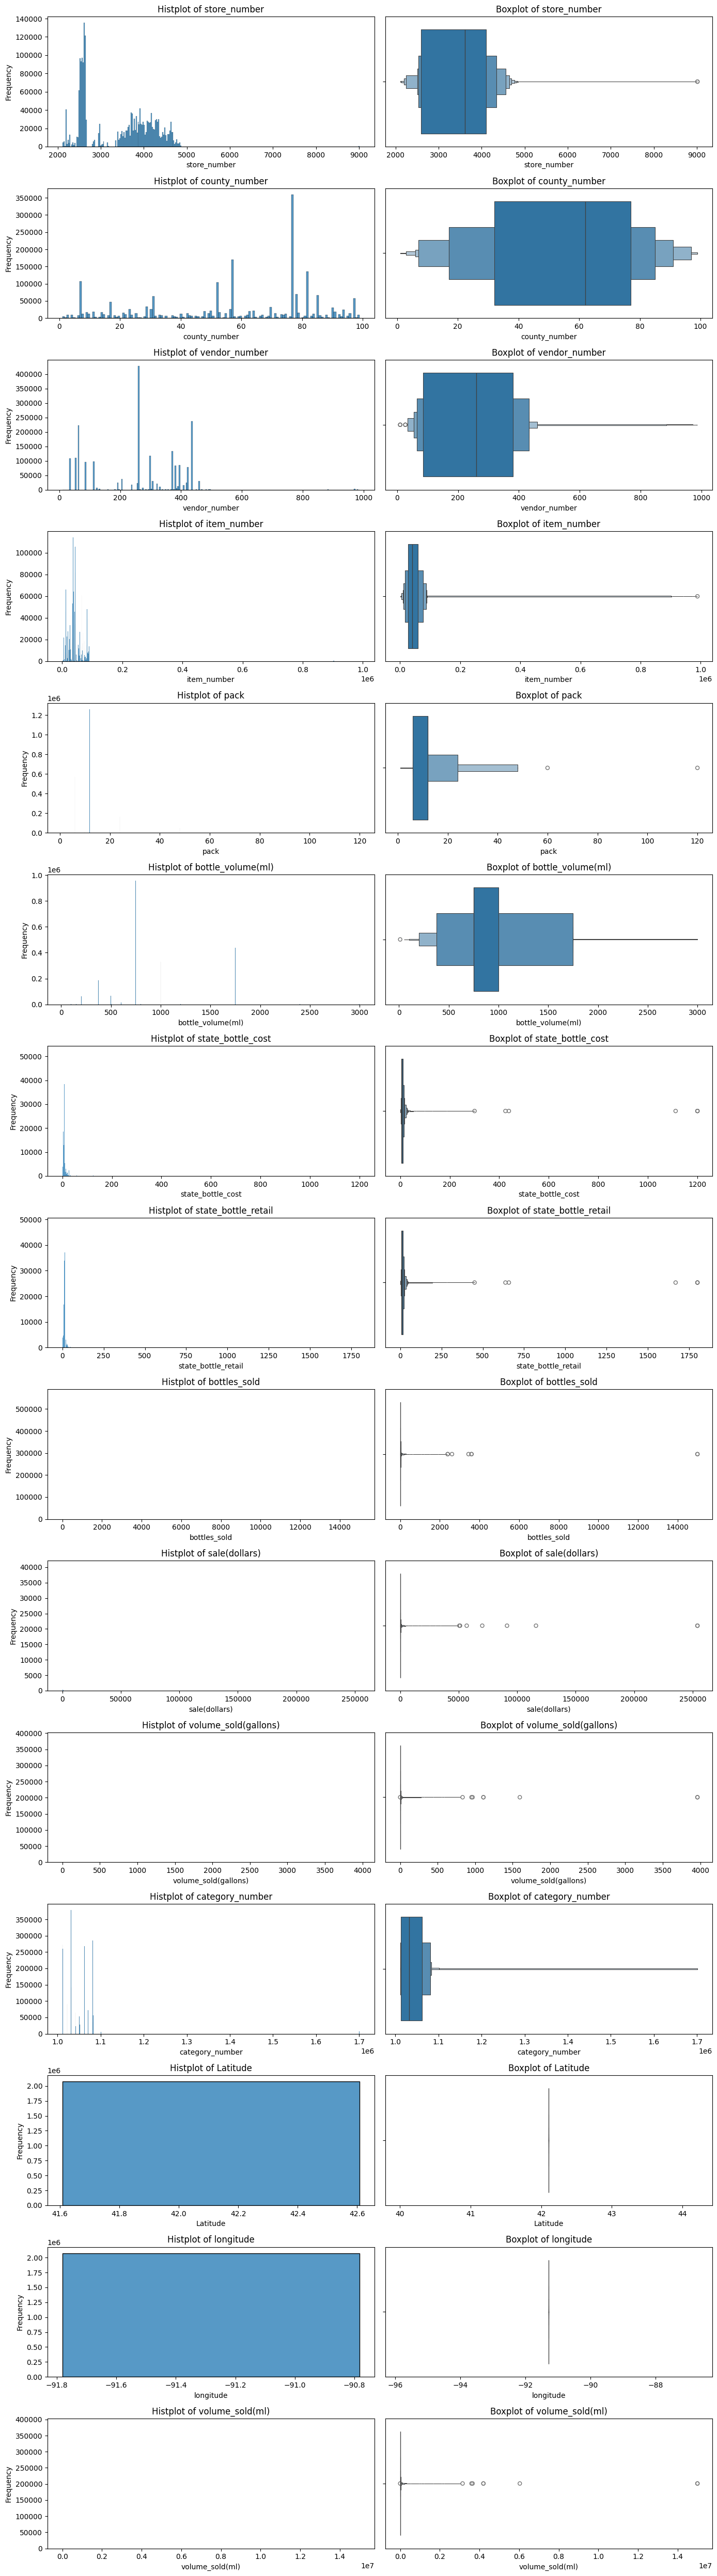

In [29]:
fig, axes = plt.subplots(15, 2, figsize=(14, 50))

for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histplot of {col}')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlabel(col)

    sns.boxenplot(data=df_num, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)
    
plt.tight_layout()  # Ajustar los gráficos
plt.show()  # Mostrar los gráficos

## Numerical Analysis
- Pack: We have 2 outliers, and they appear around values of 60 and 120.

- Bottle_volume: There are lower outliers, which might make sense due to mini bottles, but most data points are between 25 ml and 1800 ml.

- State_bottle_cost and State Bottle Retail: These are almost identical; the difference is that the retail value is higher because it's the in-store marked-up price.

- bottle_sales: Contains high outliers.

- Volume_Sold_(gallons): Very similar to the previous one, and Volume Sold (ml) has a similar shape, since both come from the same calculation.

In [ ]:
df.to_parquet("../data_transformation/dataset_cleaned.parquet")